In [10]:
import dask
import dask.threaded
import dask.multiprocessing
from dask.distributed import Client

c = Client()
c

/scratch/cnt0024/hmg2840/albert7a/anaconda3/lib/python3.7/site-packages/distributed/bokeh/core.py:74: UserWarning: 
Failed to start diagnostics server on port 8787. [Errno 13] Permission denied
  warnings.warn("\n" + msg)


Client Scheduler: tcp://127.0.0.1:39853 Dashboard: http://127.0.0.1:46818/status,Cluster Workers: 8 Cores: 48 Memory: 118.00 GB


In [11]:
import sys
import numpy as np
import numpy.ma as ma
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import cmocean
import glob

%matplotlib inline


In [12]:
#params
freq='1d'
year='2010'


In [13]:
config1='EU36'
case1='MPC001'
datadir1='/scratch/cnt0024/hmg2840/colombo/'+str(config1)+'/'+str(config1)+'-'+str(case1)+'-S/'+str(freq)+'/'+str(year)+'/'
#!ls $datadir
gridfile1='/scratch/cnt0024/hmg2840/colombo/EU36/EU36-I/coordinates_EU36.nc'
maskfile1='/scratch/cnt0024/hmg2840/colombo/EU36/EU36-I/EU36.L75_mesh_mask.nc'

In [14]:
#EU in NACHOS 970      1213       651      1224
config2='NACHOS12.L75'
case2='MAA4001'
datadir2='/scratch/cnt0024/hmg2840/albert7a/'+str(config2)+'/'+str(config2)+'-'+str(case2)+'-S/'+str(freq)+'/'+str(year)+'/'
#!ls $datadir
gridfile2='/scratch/cnt0024/hmg2840/albert7a/NACHOS12.L75/NACHOS12.L75-I/NACHOS12.L75_coordinates.nc'
maskfile2='/scratch/cnt0024/hmg2840/albert7a/NACHOS12.L75/NACHOS12.L75-I/NACHOS12.L75_MAA40_mesh_mask.nc'

In [15]:
def get_var(datadir,config,case,year,freq,typ,var):
    filesT=sorted(glob.glob(datadir+'/'+str(config)+'-'+str(case)+'_y'+str(year)+'m??d??.'+str(freq)+'_'+str(typ)+'.nc'))
    dsT=xr.open_mfdataset(filesT)
    tem=dsT[var]
    return tem

In [16]:
dsmask1=xr.open_dataset(maskfile1)
maskT1=dsmask1.tmask[0]
dsmask2=xr.open_dataset(maskfile2)
maskT2=dsmask2.tmask[0,:,651:1224,970:1213]

In [17]:
tem1=get_var(datadir1,config1,case1,year,freq,'gridT','votemper')
sal1=get_var(datadir1,config1,case1,year,freq,'gridT','vosaline')
ssh1=get_var(datadir1,config1,case1,year,freq,'gridT','sossheig')

tem2int=get_var(datadir2,config2,case2,year,freq,'gridT','votemper')
sal2int=get_var(datadir2,config2,case2,year,freq,'gridT','vosaline')
ssh2int=get_var(datadir2,config2,case2,year,freq,'gridT','sossheig')
tem2=tem2int[:,:,651:1224,970:1213]
sal2=sal2int[:,:,651:1224,970:1213]
ssh2=ssh2int[:,651:1224,970:1213]

In [18]:
month_name={1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}
ax_nb={1:(0,0),2:(0,1),3:(0,1),4:(0,1),5:(0,1),6:(0,1),7:(0,1),8:(0,1),9:(0,1),10:'October',11:'November',12:('December')}
def plot_monthly(var1,var2,confcase1,confcase2,mask1,mask2,varname,vmin1,vmax1,vmin2,vmax2,cmap):
    fig, axes = plt.subplots(12,2,figsize=(10,65))
    axes = axes.ravel()
    for m in np.arange(1,13):
        if m < 10:
            month='0'+str(m)
        else:
            month=str(m)
        if m in [1,3,5,7,8,10,12]:
            dayf='31'
        elif m == 2:
            dayf='28'
        else:
            dayf='30'
        ax1=axes[2*(m-1)]
        ax2=axes[2*(m-1)+1]
        var1.sel(time_counter=slice('2010-'+month+'-01','2010-'+month+'-'+dayf)).mean(dim='time_counter').plot(cmap=cmap,ax=ax1,vmin=vmin1,vmax=vmax1,add_labels=True)
        ax1.set_title(month_name[m]+'-'+str(confcase1))
        var2.sel(time_counter=slice('2010-'+month+'-01','2010-'+month+'-'+dayf)).mean(dim='time_counter').where(mask2==1).plot(cmap=cmap,ax=ax2,vmin=vmin2,vmax=vmax2,add_labels=True)
        ax2.set_title(month_name[m]+'-'+str(confcase2))
    fig.suptitle('Monthly mean of Surface'+str(varname))
    plt.savefig(confcase1+'-'+confcase2+'_y'+str(year)+'.1m_surf_'+varname+'.png')

In [23]:
#debug
#m =1
#if m < 10:
#    month='0'+str(m)
#else:
#    month=str(m)
#if m in [1,3,5,7,8,10,12]:
#    dayf='31'
#elif m == 2:
#    dayf='28'
#else:
    #dayf='30'
#before=tem2[:,0].sel(time_counter=slice('2010-'+month+'-01','2010-'+month+'-'+dayf)).mean(dim='time_counter')    
#truc=tem2[:,0].sel(time_counter=slice('2010-'+month+'-01','2010-'+month+'-'+dayf)).mean(dim='time_counter').where(maskT2==1)



In [25]:
#maskT1.shape

(75, 1718, 732)

distributed.nanny - WARNING - Worker process 14873 was killed by signal 11
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker process 17184 was killed by signal 7
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker process 58466 was killed by signal 7
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker process 58462 was killed by signal 11
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker process 58470 was killed by signal 11
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker process 14871 was killed by signal 11
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker process 23566 was killed by signal 11
distributed.nanny - WARNING - Worker process 23159 was killed by signal 11
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny 

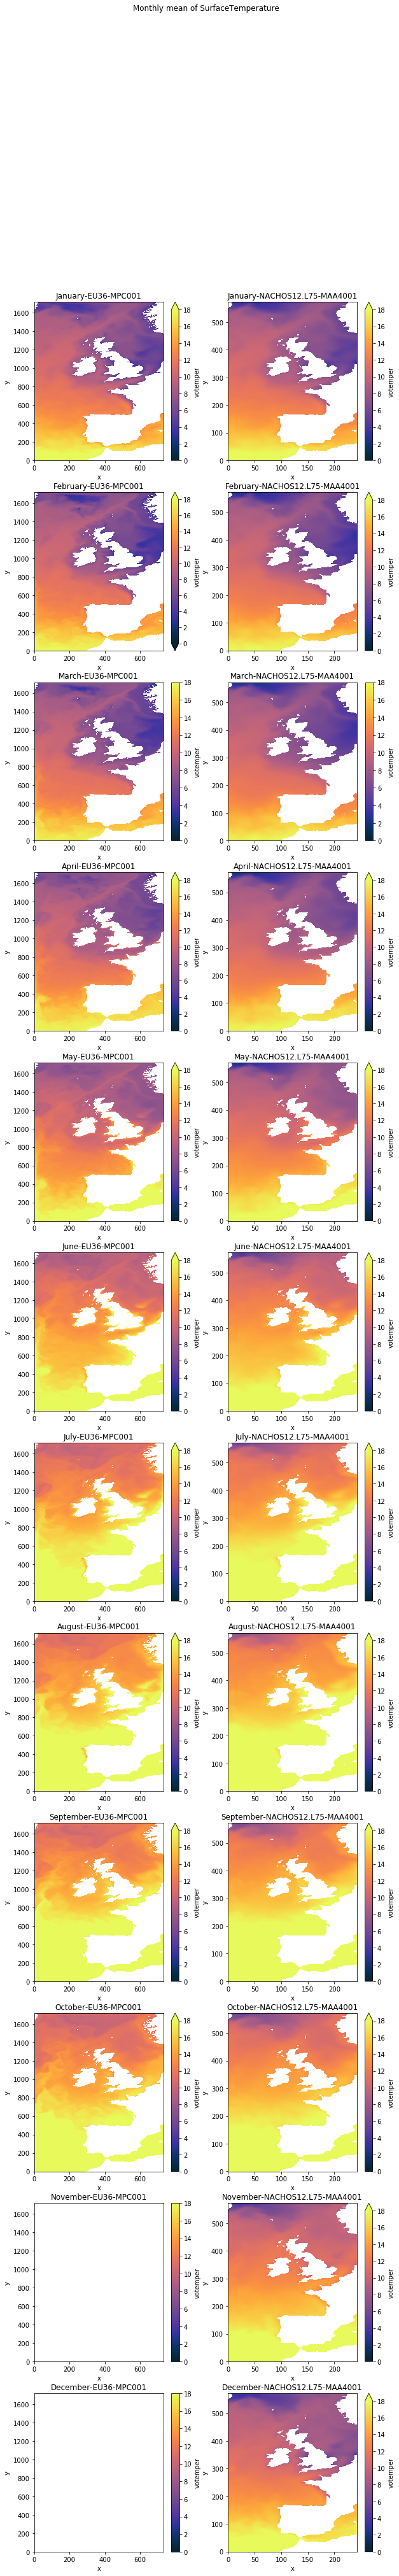

In [26]:
plot_monthly(tem1[:,0],tem2[:,0],config1+'-'+case1,config2+'-'+case2,maskT1[0],maskT2[0],'Temperature',0,18,'cmo.thermal')


distributed.nanny - WARNING - Worker process 23507 was killed by signal 11
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker process 23387 was killed by signal 7
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker process 23448 was killed by signal 7
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker process 58468 was killed by signal 11
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Worker process 26730 was killed by signal 7
distributed.nanny - WARNING - Worker process 23741 was killed by signal 7
distributed.nanny - WARNING - Worker process 23739 was killed by signal 11
distributed.nanny - WARNING - Worker process 23936 was killed by signal 11
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - 

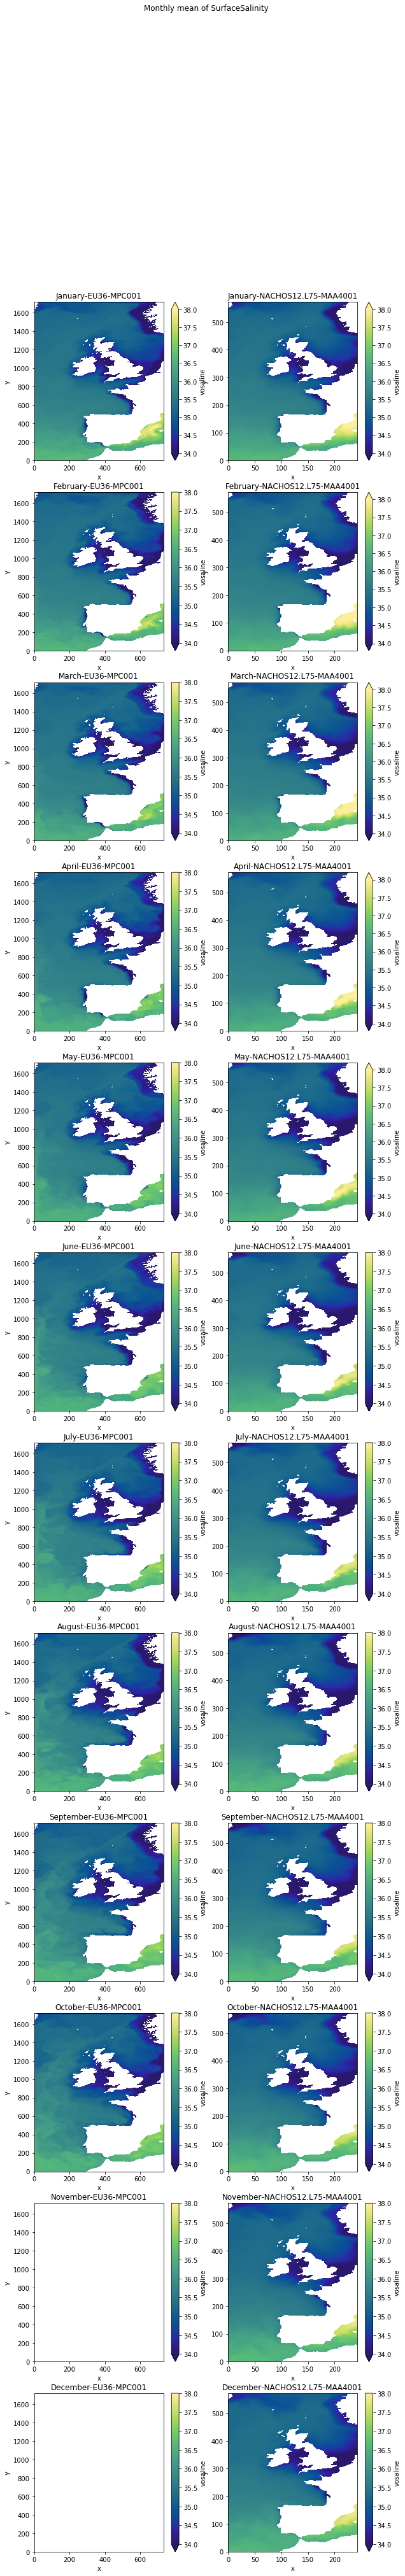

In [27]:
plot_monthly(sal1[:,0],sal2[:,0],config1+'-'+case1,config2+'-'+case2,maskT1[0],maskT2[0],'Salinity',34,38,'cmo.haline')


OSError: [Errno -101] NetCDF: HDF error: b'/scratch/cnt0024/hmg2840/colombo/EU36/EU36-MPC001-S/1d/2010/EU36-MPC001_y2010m01d08.1d_gridT.nc'

distributed.nanny - WARNING - Worker process 7535 was killed by signal 11
distributed.nanny - WARNING - Restarting worker


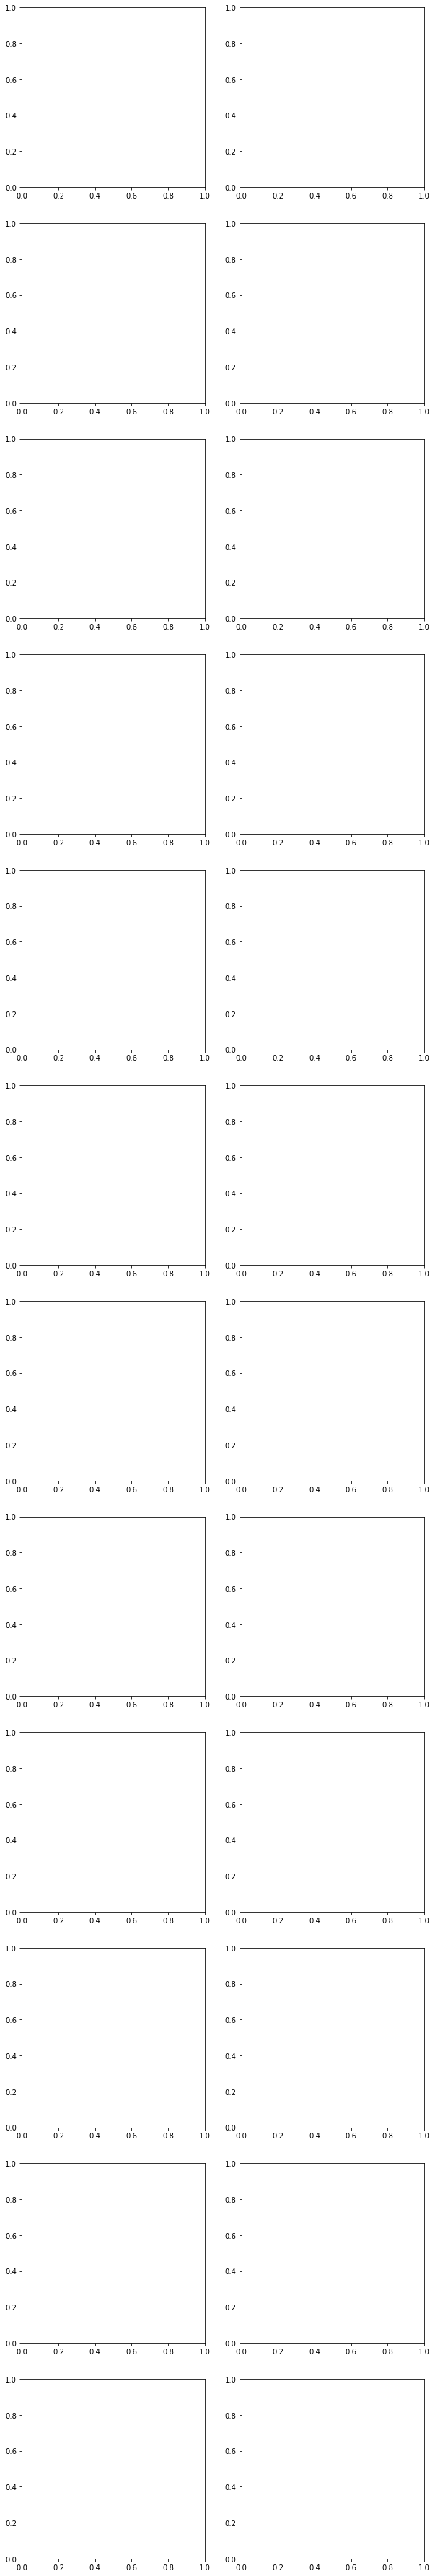

In [20]:
plot_monthly(ssh1,ssh2,config1+'-'+case1,config2+'-'+case2,maskT1[0],maskT2[0],'Height',-0.5,0.5,-1.5,-0.7,'tab20b')

